# LIBRARIES

In [258]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
# set randomseed
rng = np.random.default_rng(seed=42)

Regression models

In [259]:
from lightgbm import LGBMRegressor

# **Data collection and processing**

In [260]:
# loading the data from csv file to a Pandas DataFrame
dataframe_prog= pd.read_csv('E:\IOMT\Task 3\stats_program.csv',index_col=0)

In [261]:
dataframe_prog.head()

,process_cpu_percent,process_rss_percent,proces_vms_percent,process_data_percent,data_time
S.no,,,,,
1,0.0,13.307912,26.576486,14.105149,1665678397
2,0.0,13.307912,26.576486,14.105149,1665678399
3,0.0,13.207294,26.576486,14.105149,1665678401
4,0.0,13.202747,26.576486,14.105149,1665678403
5,61.9,9.193432,22.451134,9.979797,1665678405


In [262]:
dataframe_ster=pd.read_csv('E:\IOMT\Task 3\stats_serialized.csv',index_col=0)

In [263]:
dataframe_ster.head()

,cpu_times_user,cpu_times_nice,cpu_times_system,cpu_times_idle,cpu_times_iowait,cpu_times_irq,cpu_times_softirq,cpu_times_steal,cpu_times_guest,cpu_times_guest_nice,...,swap_sout,disk_read_count,disk_write_count,disk_read_bytes,disk_write_bytes,disk_read_time,disk_write_time,disk_read_merged_count,disk_write_merged_count,disk_busy_count
s.no,,,,,,,,,,,,,,,,,,,,,
1,316.83,10.83,28.97,7749.76,193.11,0,0.54,0,0,0,...,495980544,59506,15120,2158542336,1280365568,477475,455251,19464,121598,265428
2,317.00,10.83,28.98,7751.53,193.14,0,0.54,0,0,0,...,495980544,59512,15120,2158571008,1280365568,477507,455251,19465,121598,265472
3,317.10,10.83,29.00,7753.41,193.14,0,0.54,0,0,0,...,495980544,59513,15161,2158575104,1280640000,477508,455258,19465,121599,265480
4,317.47,10.83,29.01,7755.01,193.14,0,0.54,0,0,0,...,495980544,59513,15163,2158575104,1280668672,477508,455307,19465,121604,265532
5,317.49,10.83,29.02,7756.94,193.19,0,0.54,0,0,0,...,495980544,59513,15163,2158575104,1280668672,477508,455307,19465,121604,265532


Combining the Two data sets

In [264]:
# replacing the 0 values with mean
dataframe=dataframe_prog.drop(columns=['data_time'],axis=1)
dataframe_prog['process_cpu_percent']=dataframe_prog['process_cpu_percent'].replace(0,dataframe_prog['process_cpu_percent'].mean())
dataframe=pd.concat([dataframe_prog,dataframe_ster['cpu_times_user']],axis=1)


In [265]:
dataframe

,process_cpu_percent,process_rss_percent,proces_vms_percent,process_data_percent,data_time,cpu_times_user
1,42.747434,13.307912,26.576486,14.105149,1.665678e+09,316.83
2,42.747434,13.307912,26.576486,14.105149,1.665678e+09,317.00
3,42.747434,13.207294,26.576486,14.105149,1.665678e+09,317.10
4,42.747434,13.202747,26.576486,14.105149,1.665678e+09,317.47
5,61.900000,9.193432,22.451134,9.979797,1.665678e+09,317.49
...,...,...,...,...,...,...
5224,NaN,NaN,NaN,NaN,NaN,7802.88
5225,NaN,NaN,NaN,NaN,NaN,7804.87
5226,NaN,NaN,NaN,NaN,NaN,7806.85
5227,NaN,NaN,NaN,NaN,NaN,7808.82


In [266]:
dataframe = dataframe.dropna()

In [267]:
dataframe

,process_cpu_percent,process_rss_percent,proces_vms_percent,process_data_percent,data_time,cpu_times_user
1,42.747434,13.307912,26.576486,14.105149,1.665678e+09,316.83
2,42.747434,13.307912,26.576486,14.105149,1.665678e+09,317.00
3,42.747434,13.207294,26.576486,14.105149,1.665678e+09,317.10
4,42.747434,13.202747,26.576486,14.105149,1.665678e+09,317.47
5,61.900000,9.193432,22.451134,9.979797,1.665678e+09,317.49
...,...,...,...,...,...,...
717,42.747434,9.828771,23.288698,10.817361,1.665680e+09,930.49
718,82.000000,16.246402,32.496758,20.025421,1.665680e+09,932.48
719,99.900000,16.767087,32.496758,20.025421,1.665680e+09,934.40
720,97.900000,17.532498,32.496758,20.025421,1.665680e+09,936.37


# **`Data analysis`**

In [268]:
print(type(dataframe.shape),dataframe.shape)


<class 'tuple'> (721, 6)


In [269]:
dataframe.info

<bound method DataFrame.info of      process_cpu_percent  process_rss_percent  proces_vms_percent  \
1              42.747434            13.307912           26.576486   
2              42.747434            13.307912           26.576486   
3              42.747434            13.207294           26.576486   
4              42.747434            13.202747           26.576486   
5              61.900000             9.193432           22.451134   
..                   ...                  ...                 ...   
717            42.747434             9.828771           23.288698   
718            82.000000            16.246402           32.496758   
719            99.900000            16.767087           32.496758   
720            97.900000            17.532498           32.496758   
721            97.900000            18.469297           32.496758   

     process_data_percent     data_time  cpu_times_user  
1               14.105149  1.665678e+09          316.83  
2               14.1051

In [270]:
dataframe.describe()

,process_cpu_percent,process_rss_percent,proces_vms_percent,process_data_percent,data_time,cpu_times_user
count,721.000000,721.000000,721.000000,721.000000,7.210000e+02,721.000000
mean,63.261459,11.630178,25.344801,12.873464,1.665679e+09,573.517157
std,28.238128,2.501399,2.579191,2.579191,4.194949e+02,188.420197
min,1.000000,7.287417,21.005116,8.533779,1.665678e+09,316.830000
25%,42.747434,9.382018,23.029343,10.558007,1.665679e+09,396.890000
50%,42.747434,11.955989,26.099290,13.627953,1.665679e+09,547.920000
75%,97.900000,13.517451,27.130183,14.658847,1.665679e+09,733.210000
max,100.900000,21.860075,34.357703,21.886367,1.665680e+09,938.370000


In [271]:
#STANDARD SCALLER
col_names = ['S.no','process_cpu_percent','process_rss_percent','proces_vms_percent','process_data_percent','cpu_times_user']
features = dataframe[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
dataframe_scaled = pd.DataFrame(features, columns = col_names)

In [272]:
dataframe_scaled

,process_cpu_percent,process_rss_percent,proces_vms_percent,process_data_percent,cpu_times_user
0,-0.726970,0.671184,0.477879,0.477879,-1.363258
1,-0.726970,0.671184,0.477879,0.477879,-1.362355
2,-0.726970,0.630931,0.477879,0.477879,-1.361824
3,-0.726970,0.629112,0.477879,0.477879,-1.359859
4,-0.048247,-0.974829,-1.122707,-1.122707,-1.359753
...,...,...,...,...,...
716,-0.726970,-0.720660,-0.797742,-0.797742,1.895872
717,0.664051,1.846738,2.774871,2.774871,1.906441
718,1.298385,2.055040,2.774871,2.774871,1.916638
719,1.227510,2.361246,2.774871,2.774871,1.927101


In [273]:
dataframe.index.values


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [274]:
dataframe

,process_cpu_percent,process_rss_percent,proces_vms_percent,process_data_percent,data_time,cpu_times_user
1,42.747434,13.307912,26.576486,14.105149,1.665678e+09,316.83
2,42.747434,13.307912,26.576486,14.105149,1.665678e+09,317.00
3,42.747434,13.207294,26.576486,14.105149,1.665678e+09,317.10
4,42.747434,13.202747,26.576486,14.105149,1.665678e+09,317.47
5,61.900000,9.193432,22.451134,9.979797,1.665678e+09,317.49
...,...,...,...,...,...,...
717,42.747434,9.828771,23.288698,10.817361,1.665680e+09,930.49
718,82.000000,16.246402,32.496758,20.025421,1.665680e+09,932.48
719,99.900000,16.767087,32.496758,20.025421,1.665680e+09,934.40
720,97.900000,17.532498,32.496758,20.025421,1.665680e+09,936.37


In [275]:
dataframe.columns

Index(['process_cpu_percent', 'process_rss_percent', 'proces_vms_percent',
       'process_data_percent', 'data_time', 'cpu_times_user'],
      dtype='object')

KeyError: 'S.no'

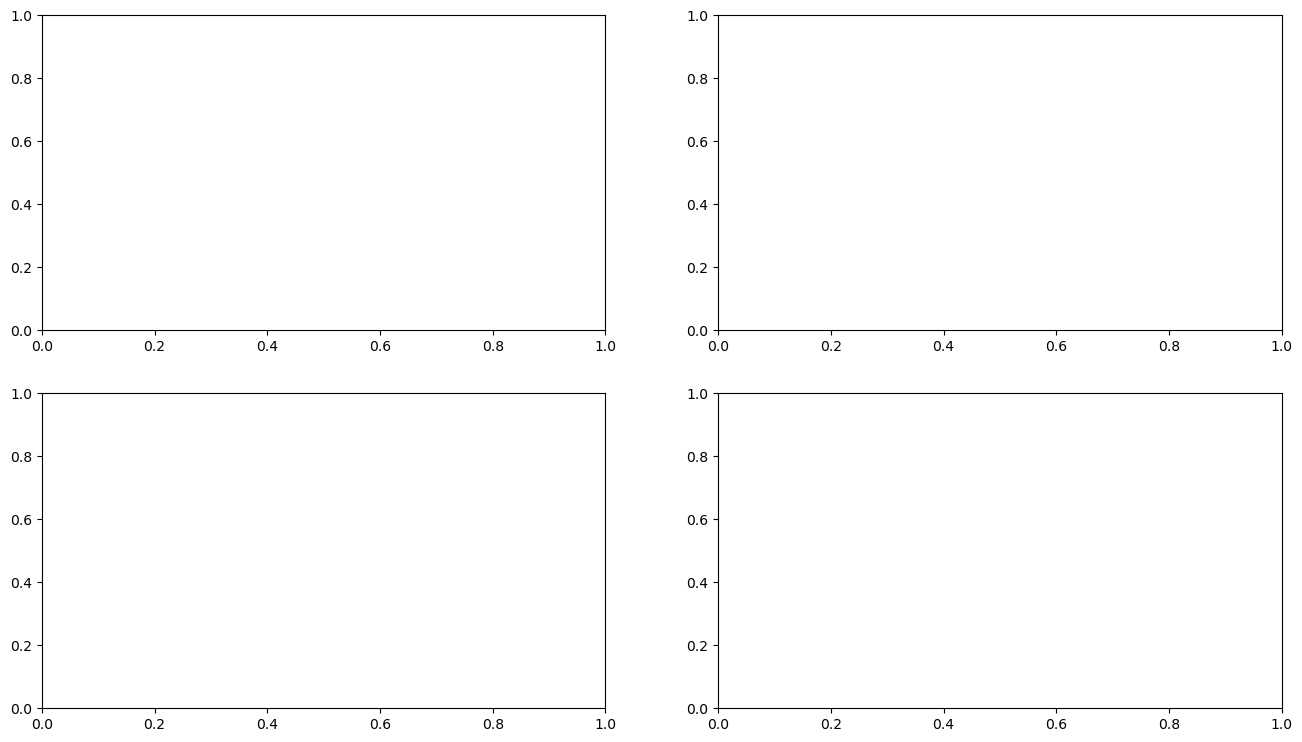

In [276]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.distplot(x=dataframe['S.no'],y=dataframe['process_cpu_percent'], ax=axes[0, 0])
sns.distplot(x=dataframe['S.no'],y=dataframe['process_rss_percent'],ax=axes[0, 1])
sns.distplot(x=dataframe['S.no'],y=dataframe['proces_vms_percent'],ax=axes[1, 0])
sns.distplot(x=dataframe['S.no'],y=dataframe['process_data_percent'],ax=axes[1, 1])

plt.show()

# **DATA CORELATION**

The data points are said to be positively co related if they are directly proportional to each other.
The data points are said to be negitively co related if they are in
directly proportional to each other.

In [ ]:
relation=dataframe_scaled.corr()

<AxesSubplot:>

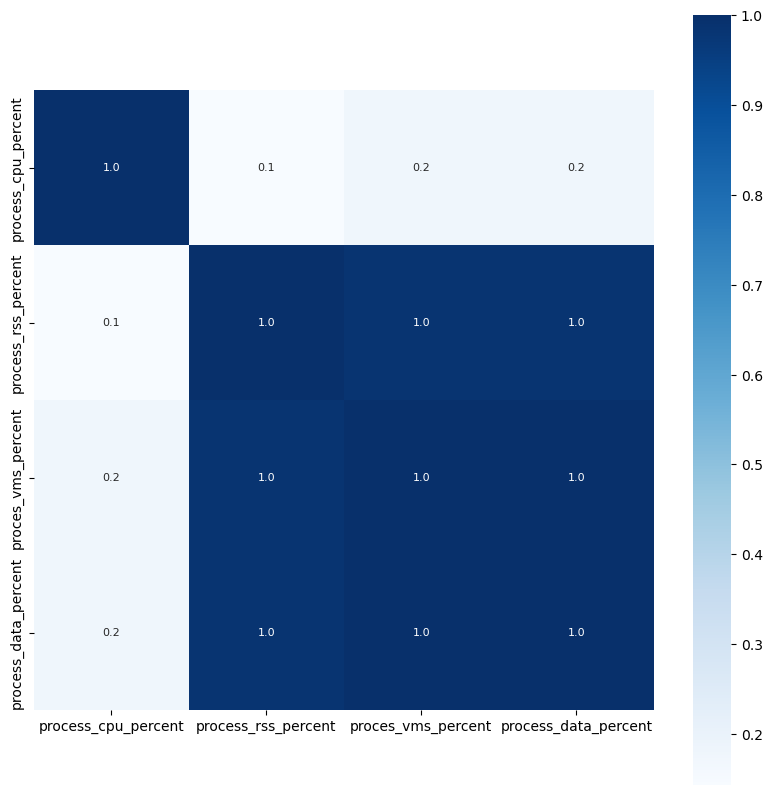

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(relation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# **Adjusting the axis**

In [ ]:
X = dataframe_scaled.drop(columns=['process_cpu_percent','process_rss_percent','proces_vms_percent','process_data_percent'], axis=1)
Y = dataframe_scaled['process_cpu_percent']

In [ ]:
X

""
0
1
2
3
4
...
716
717
718
719


In [ ]:
Y

0     -0.726970
1     -0.726970
2     -0.726970
3     -0.726970
4     -0.048247
         ...   
716   -0.726970
717    0.664051
718    1.298385
719    1.227510
720    1.227510
Name: process_cpu_percent, Length: 721, dtype: float64

# **TEST TRAIN USING FUNCTIONS**

NN-NEAREST NEIGHBOUR

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

In [ ]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

# **TEST TRAIN SPLIT**using sklearn

> Indented block



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(721, 0) (576, 0) (145, 0)


# **Training Regression model**

In [ ]:
model1 = LGBMRegressor()

In [ ]:
def fit(model):
   model.fit(X_train,Y_train)

In [ ]:
fit(model1)

# **Testing Regression model**

In [ ]:
Y_pred1 = model1.predict(X_test)

# **Evaluation**

R Square is calculated by the sum of squared of prediction error divided by the total sum of the square which replaces the calculated prediction with mean. R Square value is between 0 to 1 and a bigger value indicates a better fit between prediction and actual value.

In [ ]:
Y_test

457    1.192072
530   -1.462211
129   -0.726970
108   -0.726970
710    1.262948
         ...   
603    1.227510
356    1.298385
32    -0.726970
273    1.298385
496   -1.426773
Name: process_cpu_percent, Length: 145, dtype: float64

In [ ]:
len(Y_pred1)

145

In [ ]:
len(Y_test)

145

In [ ]:
print(Y_pred1)

[-0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345
 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345
 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345
 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345
 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345
 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345
 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345
 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345
 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345
 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345
 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345
 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345
 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0.01429345
 -0.01429345 -0.01429345 -0.01429345 -0.01429345 -0

In [ ]:
metrics.r2_score(Y_test, Y_pred1,  sample_weight=None, multioutput='uniform_average')

-0.0048613049619854465

Mean Square Error(MSE)/Root Mean Square Error(RMSE)
While R Square is a relative measure of how well the model fits dependent variables, Mean Square Error is an absolute measure of the goodness for the fit.MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points.

In [ ]:
metrics.mean_squared_error(Y_test, Y_pred1, sample_weight=None, multioutput='uniform_average', squared=True)

1.0441488515587867

C:\Users\deeks\AppData\Local\Temp\ipykernel_8096\2091905263.py:3: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


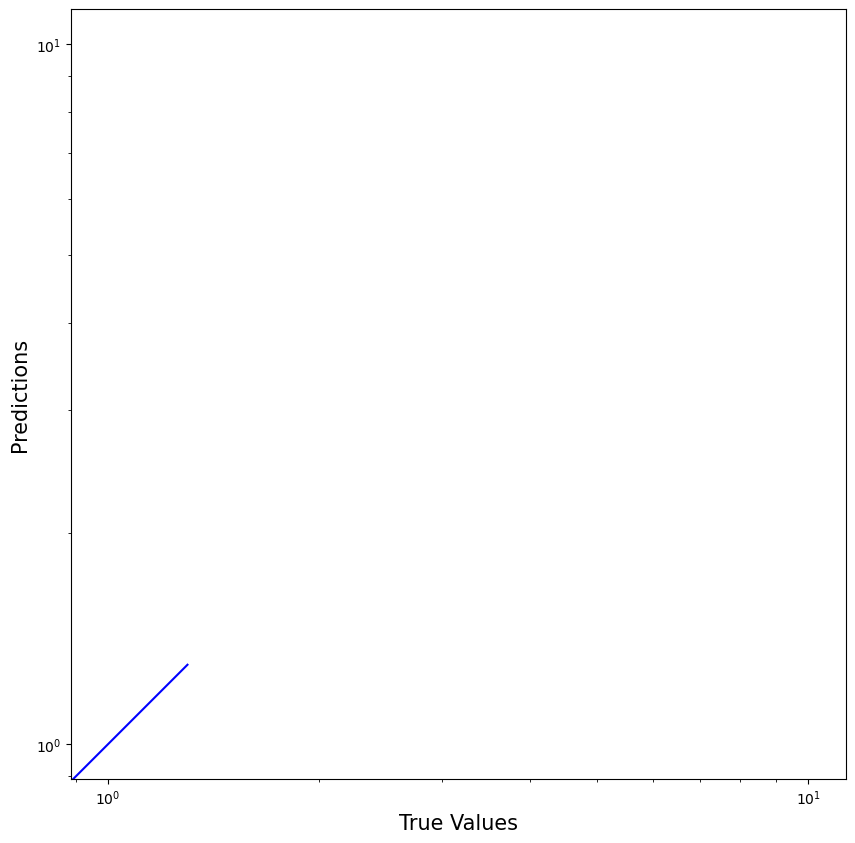

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred1, c=['crimson'])
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred1), max(Y_test))
p2 = min(min(Y_pred1), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
Y_pred1.shape

(145,)

In [ ]:
Y_test.shape

(145,)

In [ ]:
X_test.shape

(145, 0)